# Trabajo Final - Parte 1: Análisis Exploratorio y Descriptivo
## Visualización de Datos - Latinobarómetro 2024

Este notebook contiene el análisis exploratorio sobre la base de datos de Latinobarómetro 2024, según los requisitos del trabajo final.


In [1]:
# Instalación de dependencias necesarias
!pip install pandas numpy matplotlib seaborn plotly scipy -q


In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## 1. Carga y Exploración Inicial de Datos


In [3]:
# Carga de datos principales
# Nota: El archivo usa punto y coma como separador
df = pd.read_csv('../data/Latinobarometro_2024.csv', sep=';', encoding='utf-8')

# Carga de códigos de países
country_codes = pd.read_csv('../data/country_codes.csv', encoding='utf-8')

print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras columnas: {list(df.columns[:20])}")
print(f"\nPrimeras filas:")
df.head(3)


Dimensiones del dataset: (19214, 332)

Primeras columnas: ['NUMINVES', 'IDENPA', 'NUMENTRE', 'REG', 'CIUDAD', 'TAMCIUD', 'COMDIST', 'EDAD', 'SEXO', 'CODIGO', 'DIAREAL', 'MESREAL', 'INI', 'FIN', 'DURA', 'TOTRECH', 'TOTNOCONT', 'TOTREVI', 'EDESCSINCONT', 'NEGATELEGDESC']

Primeras filas:


,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODIGO,DIAREAL,MESREAL,INI,FIN,DURA,TOTRECH,TOTNOCONT,TOTREVI,EDESCSINCONT,NEGATELEGDESC,OTROSELEGDES,TOTCUOT,NUMCASA,CODSUPER,SUPERVVI,SUPERVEN,CODIF,DIGIT,P1ST,P2ST,P3N,P4ST,P5STGBS,P6STGBS,P7STGBS,P8ST,P9STGBS,P10STGBS,P11STGBS,P12STGBS.A,P12STGBS.B,P13ST,P14STGBS.A,P14STGBS.B,P14ST.C,P14ST.D,P14ST.E,P14ST.F,P14ST.G,P14ST.H,P14ST.I,P14ST.J,P14ST.K,P14ST.L,P14ST.M,P14ST.N,P15STGBS,P16ST,P17ST,P18ST.A,P18ST.B,P18ST.C,P18ST.D,P19ST,P20ST,P21ST,P22N,P23STM.1,P23STM.2,P23STM.3,P24STGBS,P25ST,P26ST,P27ST,P28ST,P28ST.A,P28ST.B,P28ST.C,P28ST.D,P29ST.A,P29ST.B,P29ST.C,P29ST.D,P29ST.E,P29ST.F,P29ST.G,P29ST.H,P30ST.A,P30ST.B,P30ST.C,P30ST.D,P30ST.E,P1TE.A,P1TE.B,P1TE.C,P1TE.D,P2TE.A,P2TE.B,P2TE.C,P2TE.D,P3TE,P31ST,P32ST.A,P32ST.B,P33ST.A,P33ST.B,P33N.C,P33ST.D,P33N.E,P34ST,P35ST,P1NCV,P2NCV.1,P2NCV.2,P2NCV.3,P2NCV.4,P2NCV.5,P2NCV.6,P2NCV.7,P2NCV.8,P2NCV.9,P2NCV.10,P2NCV.11,P2NCV.12,P3NCV,P4NCV.1,P4NCV.2,P4NCV.3,P4NCV.4,P4NCV.5,P4NCV.6,P4NCV.7,P4NCV.8,P4NCV.9,P5NCV.1,P5NCV.2,P5NCV.3,P5NCV.4,P5NCV.5,P5NCV.6,P6NCV.1,P6NCV.2,P6NCV.3,P6NCV.4,P6NCV.5,P6NCV.6,P6NCV.7,P6NCV.8,P7NCV.A,P7NCV.B,P7NCV.C,P7NCV.D,P7NCV.E,P7NCV.F,P7NCV.G,P8NCV.A,P8NCV.B,P8NCV.C,P8NCV.D,P9NCV.1,P9NCV.2,P9NCV.3,P9NCV.4,P9NCV.5,P9NCV.6,P9NCV.7,P9NCV.8,P36STGBS,P37ST.A,P37ST.B,P38STGBS,P39STGBS.A,P40STGBS.B,P41ST,P42ST,P43ST,P44ST,P45ST,P46ST,P47ST.A,P47ST.B,P47ST.C,P47ST.D,P48ST.1,P48ST.2,P48ST.3,P48ST.4,P48ST.5,P48ST.6,P48ST.7,P48ST.8,P48ST.9,P48ST.10,P48ST.11,P49ST.A,P49ST.B,P49ST.C,P50ST.A,P50ST.B,P50ST.C,P51ST,P52N,P53N,P54N,P55ST,P56N.1,P56ST.2,P56N.3,P56ST.4,P56ST.5,P56ST.6,P56ST.7,P56ST.8,P56ST.9,P56ST.10,P56ST.11,P56ST.12,P56N.13,P56ST.14,P57N,P1NOIJ,P2NOIJ.1,P2NOIJ.2,P2NOIJ.3,P2NOIJ.4,P2NOIJ.5,P2NOIJ.6,P2NOIJ.7,P2NOIJ.8,P2NOIJ.9,P2NOIJ.10,P2NOIJ.11,P2NOIJ.12,P3NOIJ.1,P3NOIJ.2,P3NOIJ.3,P3NOIJ.4,P3NOIJ.5,P3NOIJ.6,P3NOIJ.7,P3NOIJ.8,P3NOIJ.9,P4NOIJ.1,P4NOIJ.2,P4NOIJ.3,P4NOIJ.4,P4NOIJ.5,P5NOIJ,P6NOIJ,P7NOIJ,P8NOIJ,P9NOIJ,P10NOIJ,S00N,S0N,S1,S1A,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13P1STINT.1,S13P1STINT.2,S13P1STINT.3,S13P1STINT.4,S13P1STINT.5,S13P1STINT.6,P2NINT,P3NINT,P4NINT.1,P4NINT.2,P4NINT.3,P4NINT.4,P4NINT.5,P4NINT.6,P4NINT.7,P4NINT.8,P4NINT.9,P4NINT.10,S14M.1,S14M.2,S14M.3,S14M.4,S14M.5,S14M.6,S14M.7,S14M.8,S14M.9,S14M.10,S14M.11,S15A,S15B,S16,S17,S17.A,S17.B,S17.C,S18.A,S18.B,S19,S20A,S20B,S20C,S20D,S20E,S20F,S20G,S20H,S20I,S20J,S20K,S21A,S21B,S22A,S22B,S23,S24,S25,REEDUC.1,REEDUC.2,REEDUC.3,REEDAD,PERPART,FAMPART,WT
0,24.0,32.0,1.0,32002.0,32301000.0,8.0,1.0,83.0,2.0,33.0,12.0,9.0,1101.0,1139.0,38.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,6.0,2.0,0.0,1.0,0.0,2.0,3.0,3.0,4.0,1.0,5.0,5.0,3.0,3.0,2.0,1.0,3.0,4.0,1.0,3.0,2.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,-1.0,4.0,1.0,1.0,4.0,4.0,7.0,1.0,1.0,1.0,1.0,8.0,7.0,1.0,-1.0,-1.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,-1.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,-5.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,4.0,-5.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,2.0,96.0,-3.0,2.0,2.0,2.0,5.0,-5.0,-5.0,1.0,2.0,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,4.0,96.0,-1.0,0.0,0.0,6.0,10.0,96.0,0.0,96.0,96.0,-1.0,96.0,7.0,96.0,6.0,40.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,7.0,9.0,1.0,2.0,1.0,1.0,1.0,6.0,7.0,3.0,2.0,1.0,4.0,4.0,1.0,-5.0,3.0,4.0,6.0,1.0,2.0,14.0,8.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,19411104.0,4.0,11.0,1941.0,5.0,8.0,-3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,18.0,13.0,2.0,-3.0,8.0,2.0,1.0,2.0,2.0,5.0,4.0,4.0,0.0,1.5921
1,24.0,32.0,2.0,32002.0,32301000.0,8.0,1.0,30.0,2.0,33.0,12.0,9.0,1157.0,1229.0,32.0,0.0,0.0,1

In [4]:
# Merge con códigos de países
df = df.merge(country_codes, left_on='IDENPA', right_on='Country Code', how='left')
df['Country Name'] = df['Country Name'].fillna('Unknown')

# Verificación de países incluidos
print("Países en el dataset:")
print(df['Country Name'].value_counts().sort_index())
print(f"\nTotal de registros: {len(df)}")
print(f"Código de Uruguay: {country_codes[country_codes['Country Name'] == 'Uruguay']['Country Code'].values[0]}")


Países en el dataset:
Country Name
Argentina          1210
Bolivia            1200
Brasil             1204
Chile              1200
Colombia           1200
Costa Rica         1000
Ecuador            1200
El Salvador        1000
Guatemala          1000
Honduras           1000
México             1200
Panamá             1000
Paraguay           1200
Perú               1200
Rep. Dominicana    1000
Uruguay            1200
Venezuela          1200
Name: count, dtype: int64

Total de registros: 19214
Código de Uruguay: 858


## Preparación de Variables


In [5]:
# Preparación de variables principales
# Satisfacción con la democracia
df['satisfaccion_democracia'] = df['S16'].replace([-1, -2, -3, -4, -5, 96, 97, 98, 99], np.nan)

# Grupos de edad
df['grupo_edad'] = pd.cut(df['EDAD'], bins=[0, 25, 35, 45, 55, 65, 100], 
                          labels=['16-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Confianza en redes sociales
df['confianza_redes'] = df['P23STM.2'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)

# Filtrar datos de Uruguay
uruguay_code = 858
df_uy = df[df['IDENPA'] == uruguay_code].copy()


In [6]:
# Variables para Uruguay
df_uy['anos_estudio'] = df_uy['REEDUC.3'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)
df_uy['grupo_educativo'] = pd.cut(df_uy['anos_estudio'], bins=[0, 6, 12, 99], 
                                   labels=['Primaria (0-6)', 'Secundaria (7-12)', 'Universidad (13+)'],
                                   include_lowest=True)
df_uy['confianza_gobierno'] = df_uy['S14M.1'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)
df_uy['interes_politica'] = df_uy['S17'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)
df_uy['acceso_internet'] = df_uy['S7'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)
df_uy['tiene_internet'] = df_uy['acceso_internet'].map({1: 'Sí', 2: 'No'})

if 'confianza_redes' not in df_uy.columns:
    df_uy['confianza_redes'] = df_uy['P23STM.2'].replace([-1, -2, -3, -5, 96, 97, 98, 99], np.nan)


# Parte 1: Satisfacción en la Democracia

## 1.1. ¿Cómo se distribuye la "satisfacción con la democracia" a lo largo de América Latina?


In [7]:
# Satisfacción promedio con la democracia por país
satisfaccion_por_pais = df.groupby('Country Name')['satisfaccion_democracia'].mean().sort_values()
satisfaccion_por_pais


Country Name
El Salvador        1.001000
Honduras           1.002000
Brasil             1.004153
México             1.005000
Perú               1.005000
Guatemala          1.005040
Rep. Dominicana    1.007000
Bolivia            1.007500
Venezuela          1.007506
Panamá             1.008000
Paraguay           1.010008
Colombia           1.010833
Uruguay            1.016681
Ecuador            1.021667
Argentina          1.024793
Chile              1.033417
Costa Rica         1.077000
Name: satisfaccion_democracia, dtype: float64

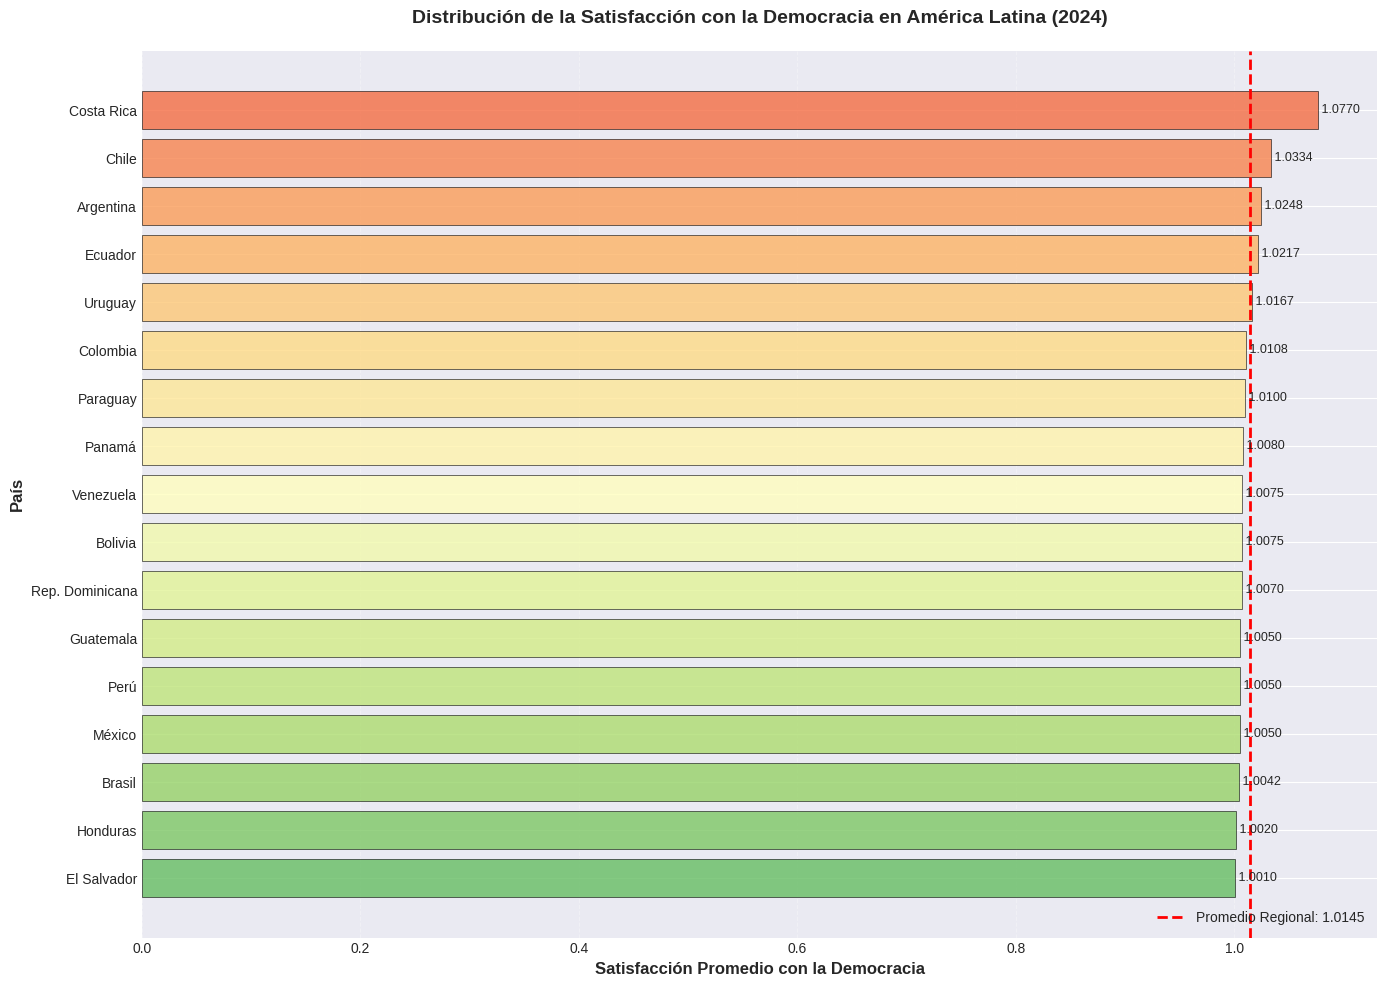


INTERPRETACIÓN DE RESULTADOS - Pregunta 1.1

La satisfacción con la democracia muestra una distribución heterogénea en América Latina.
El promedio regional es de 1.0145 puntos.

Países con MAYOR satisfacción (por encima del promedio):
  - El Salvador: 1.0010
  - Honduras: 1.0020
  - Brasil: 1.0042
  - México: 1.0050
  - Perú: 1.0050
  - Guatemala: 1.0050
  - Rep. Dominicana: 1.0070
  - Bolivia: 1.0075
  - Venezuela: 1.0075
  - Panamá: 1.0080
  - Paraguay: 1.0100
  - Colombia: 1.0108

Países con MENOR satisfacción (por debajo del promedio):
  - Uruguay: 1.0167
  - Ecuador: 1.0217
  - Argentina: 1.0248
  - Chile: 1.0334
  - Costa Rica: 1.0770

Rango de variación: 1.0010 - 1.0770
Diferencia entre extremos: 0.0760 puntos


In [8]:
# Visualización mejorada con interpretación
# Calculamos estadísticas descriptivas por país
satisfaccion_stats = df.groupby('Country Name')['satisfaccion_democracia'].agg(['mean', 'std', 'count']).sort_values('mean')
satisfaccion_media = satisfaccion_stats['mean']

# Crear figura con seaborn para mejor presentación
fig, ax = plt.subplots(figsize=(14, 10))

# Crear paleta de colores según nivel de satisfacción
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(satisfaccion_media)))

# Gráfico de barras horizontal mejorado
bars = ax.barh(satisfaccion_media.index, satisfaccion_media.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Agregar valores en las barras
for i, (country, value) in enumerate(satisfaccion_media.items()):
    ax.text(value, i, f' {value:.4f}', va='center', fontsize=9)

# Línea de referencia para el promedio regional
promedio_regional = satisfaccion_media.mean()
ax.axvline(promedio_regional, color='red', linestyle='--', linewidth=2, label=f'Promedio Regional: {promedio_regional:.4f}')

# Personalización
ax.set_xlabel('Satisfacción Promedio con la Democracia', fontsize=12, fontweight='bold')
ax.set_ylabel('País', fontsize=12, fontweight='bold')
ax.set_title('Distribución de la Satisfacción con la Democracia en América Latina (2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

# Interpretación de resultados
print("\n" + "="*70)
print("INTERPRETACIÓN DE RESULTADOS - Pregunta 1.1")
print("="*70)
print(f"\nLa satisfacción con la democracia muestra una distribución heterogénea en América Latina.")
print(f"El promedio regional es de {promedio_regional:.4f} puntos.")
print(f"\nPaíses con MAYOR satisfacción (por encima del promedio):")
mayor_satisfaccion = satisfaccion_media[satisfaccion_media < promedio_regional]
for pais, valor in mayor_satisfaccion.items():
    print(f"  - {pais}: {valor:.4f}")
print(f"\nPaíses con MENOR satisfacción (por debajo del promedio):")
menor_satisfaccion = satisfaccion_media[satisfaccion_media > promedio_regional]
for pais, valor in menor_satisfaccion.items():
    print(f"  - {pais}: {valor:.4f}")
print(f"\nRango de variación: {satisfaccion_media.min():.4f} - {satisfaccion_media.max():.4f}")
print(f"Diferencia entre extremos: {satisfaccion_media.max() - satisfaccion_media.min():.4f} puntos")
print("="*70)


## 1.2. ¿Qué países muestran los extremos de satisfacción e insatisfacción?


In [9]:
# Países con mayor y menor satisfacción
print("Países con mayor satisfacción:")
print(satisfaccion_por_pais.head(5))
print("\nPaíses con menor satisfacción:")
print(satisfaccion_por_pais.tail(5))


Países con mayor satisfacción:
Country Name
El Salvador    1.001000
Honduras       1.002000
Brasil         1.004153
México         1.005000
Perú           1.005000
Name: satisfaccion_democracia, dtype: float64

Países con menor satisfacción:
Country Name
Uruguay       1.016681
Ecuador       1.021667
Argentina     1.024793
Chile         1.033417
Costa Rica    1.077000
Name: satisfaccion_democracia, dtype: float64


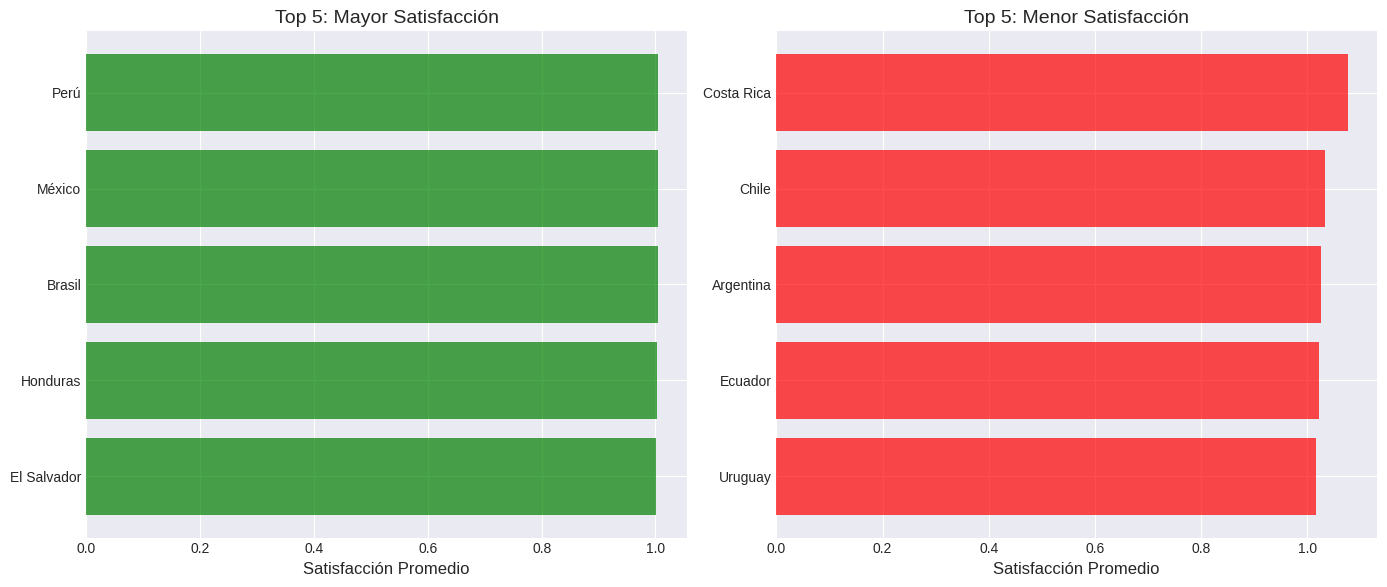

In [ ]:
# Visualización mejorada de extremos con interpretación detallada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 5 países con MAYOR satisfacción (valores más bajos = mayor satisfacción)
top5_mayor = satisfaccion_por_pais.head(5)
bars1 = ax1.barh(top5_mayor.index, top5_mayor.values, 
                 color=['#2ecc71', '#27ae60', '#229954', '#1e8449', '#196f3d'], 
                 alpha=0.8, edgecolor='black', linewidth=0.8)
ax1.set_title('Top 5: Países con Mayor Satisfacción\n(Valores más bajos)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Satisfacción Promedio', fontsize=11, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')
# Agregar valores
for i, (pais, valor) in enumerate(top5_mayor.items()):
    ax1.text(valor, i, f' {valor:.4f}', va='center', fontsize=9)

# Top 5 países con MENOR satisfacción (valores más altos = menor satisfacción)
bottom5_menor = satisfaccion_por_pais.tail(5)
bars2 = ax2.barh(bottom5_menor.index, bottom5_menor.values, 
                 color=['#e74c3c', '#c0392b', '#a93226', '#922b21', '#7b241c'], 
                 alpha=0.8, edgecolor='black', linewidth=0.8)
ax2.set_title('Top 5: Países con Menor Satisfacción\n(Valores más altos)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Satisfacción Promedio', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')
# Agregar valores
for i, (pais, valor) in enumerate(bottom5_menor.items()):
    ax2.text(valor, i, f' {valor:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Análisis e interpretación de extremos
print("\n" + "="*70)
print("INTERPRETACIÓN DE RESULTADOS - Pregunta 1.2")
print("="*70)
print("\nEXTREMOS DE SATISFACCIÓN:")
print(f"\n🔹 País con MAYOR satisfacción: {satisfaccion_por_pais.index[0]}")
print(f"   Valor: {satisfaccion_por_pais.iloc[0]:.4f}")
print(f"\n🔹 País con MENOR satisfacción: {satisfaccion_por_pais.index[-1]}")
print(f"   Valor: {satisfaccion_por_pais.iloc[-1]:.4f}")
print(f"\n🔹 Diferencia entre extremos: {satisfaccion_por_pais.iloc[-1] - satisfaccion_por_pais.iloc[0]:.4f} puntos")
print(f"\n📊 Los 5 países con mayor satisfacción representan los valores más bajos,")
print(f"   mientras que los 5 países con menor satisfacción tienen los valores más altos.")
print(f"   Esta diferencia refleja la heterogeneidad en la percepción democrática")
print(f"   a lo largo de América Latina.")
print("="*70)


## 1.3. En Uruguay, ¿existe una brecha en la "satisfacción con la democracia" según el "nivel educativo" de los ciudadanos (años de estudio)?


In [11]:
# Análisis por nivel educativo en Uruguay
brecha_educativa = df_uy.groupby('grupo_educativo')['satisfaccion_democracia'].agg(['mean', 'count']).round(2)
brecha_educativa


,mean,count
grupo_educativo,,
Primaria (0-6),1.02,405
Secundaria (7-12),1.02,88
Universidad (13+),NaN,0


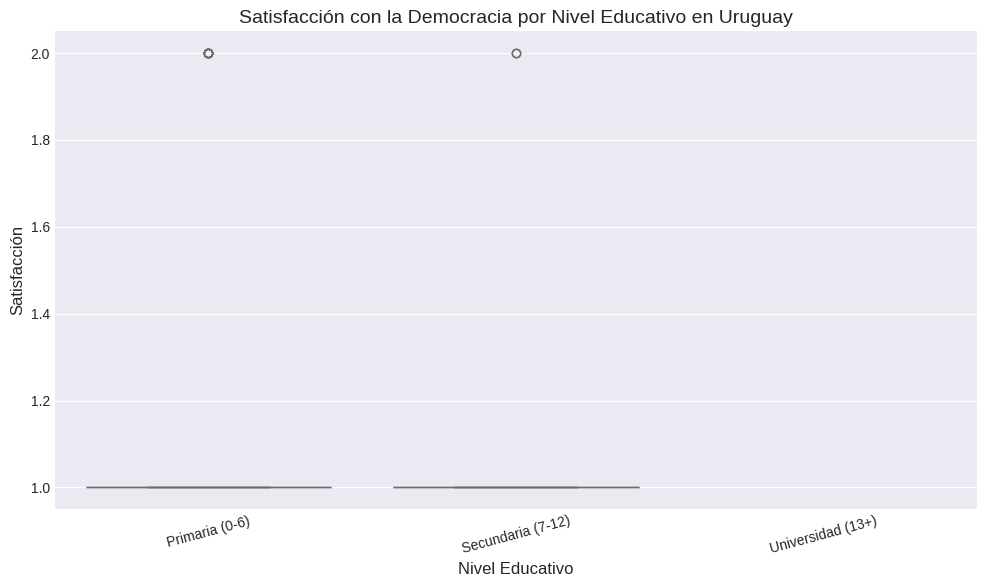

ANOVA: F=0.119, p=0.7302
No hay evidencia de brecha significativa


In [ ]:
# Visualización mejorada de la brecha educativa en Uruguay
df_uy_valid = df_uy[df_uy[['grupo_educativo', 'satisfaccion_democracia']].notna().all(axis=1)]

# Crear figura con múltiples subplots para análisis completo
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Boxplot con violín plot para ver distribución
ax1 = axes[0]
sns.boxplot(data=df_uy_valid, x='grupo_educativo', y='satisfaccion_democracia', 
            palette='Set2', ax=ax1)
ax1.set_title('Distribución de Satisfacción con la Democracia\npor Nivel Educativo en Uruguay', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Nivel Educativo (años de estudio)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Satisfacción con la Democracia', fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', rotation=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar anotaciones con los promedios
for i, grupo in enumerate(df_uy_valid['grupo_educativo'].cat.categories):
    data_grupo = df_uy_valid[df_uy_valid['grupo_educativo'] == grupo]['satisfaccion_democracia']
    if len(data_grupo) > 0:
        promedio = data_grupo.mean()
        ax1.text(i, promedio, f'\n{promedio:.3f}', ha='center', fontsize=9, 
                fontweight='bold', color='red')

# Subplot 2: Gráfico de barras con promedios y barras de error
ax2 = axes[1]
brecha_educativa = df_uy_valid.groupby('grupo_educativo')['satisfaccion_democracia'].agg(['mean', 'std', 'count'])
brecha_educativa = brecha_educativa.dropna()

bars = ax2.bar(range(len(brecha_educativa)), brecha_educativa['mean'], 
               yerr=brecha_educativa['std'], capsize=10, 
               color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8, 
               edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(brecha_educativa)))
ax2.set_xticklabels(brecha_educativa.index, rotation=15, ha='right')
ax2.set_title('Promedio de Satisfacción con la Democracia\npor Nivel Educativo (con desviación estándar)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Nivel Educativo', fontsize=11, fontweight='bold')
ax2.set_ylabel('Satisfacción Promedio', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar valores en las barras
for i, (idx, row) in enumerate(brecha_educativa.iterrows()):
    ax2.text(i, row['mean'], f'\n{row["mean"]:.3f}\n(n={int(row["count"])})', 
            ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis estadístico e interpretación
from scipy.stats import f_oneway
print("\n" + "="*70)
print("ANÁLISIS DE BRECHA EDUCATIVA - Pregunta 1.3")
print("="*70)

# Estadísticas descriptivas por grupo
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS POR NIVEL EDUCATIVO:")
for grupo in df_uy_valid['grupo_educativo'].cat.categories:
    data_grupo = df_uy_valid[df_uy_valid['grupo_educativo'] == grupo]['satisfaccion_democracia'].dropna()
    if len(data_grupo) > 0:
        print(f"\n  {grupo}:")
        print(f"    - Promedio: {data_grupo.mean():.4f}")
        print(f"    - Desviación estándar: {data_grupo.std():.4f}")
        print(f"    - Número de observaciones: {len(data_grupo)}")

# Test ANOVA
grupos = [df_uy_valid[df_uy_valid['grupo_educativo'] == g]['satisfaccion_democracia'].dropna() 
          for g in df_uy_valid['grupo_educativo'].cat.categories 
          if len(df_uy_valid[df_uy_valid['grupo_educativo'] == g]) > 0]

if len(grupos) >= 2:
    f_stat, p_value = f_oneway(*grupos)
    print(f"\n\n🔬 TEST ESTADÍSTICO (ANOVA de una vía):")
    print(f"    - Estadístico F: {f_stat:.4f}")
    print(f"    - Valor p: {p_value:.4f}")
    print(f"    - Nivel de significancia: α = 0.05")
    
    if p_value < 0.05:
        print(f"\n✅ CONCLUSIÓN: Existe una brecha significativa en la satisfacción")
        print(f"   con la democracia según el nivel educativo (p < 0.05)")
    else:
        print(f"\n✅ CONCLUSIÓN: NO hay evidencia estadística de una brecha significativa")
        print(f"   en la satisfacción con la democracia según el nivel educativo (p ≥ 0.05)")
        print(f"   Esto sugiere que en Uruguay, la satisfacción democrática es relativamente")
        print(f"   homogénea entre diferentes niveles educativos.")

print("="*70)


# Parte 2: Confianza en Redes Sociales

## 2.1. ¿Cómo varía la "confianza en las redes sociales" por grupo de edad en América Latina?


In [13]:
# Confianza en redes sociales por grupo de edad
confianza_por_edad = df.groupby('grupo_edad')['confianza_redes'].mean()
confianza_por_edad


grupo_edad
16-25    5.537587
26-35    5.455907
36-45    5.446365
46-55    5.417951
56-65    5.216985
66+      5.268028
Name: confianza_redes, dtype: float64

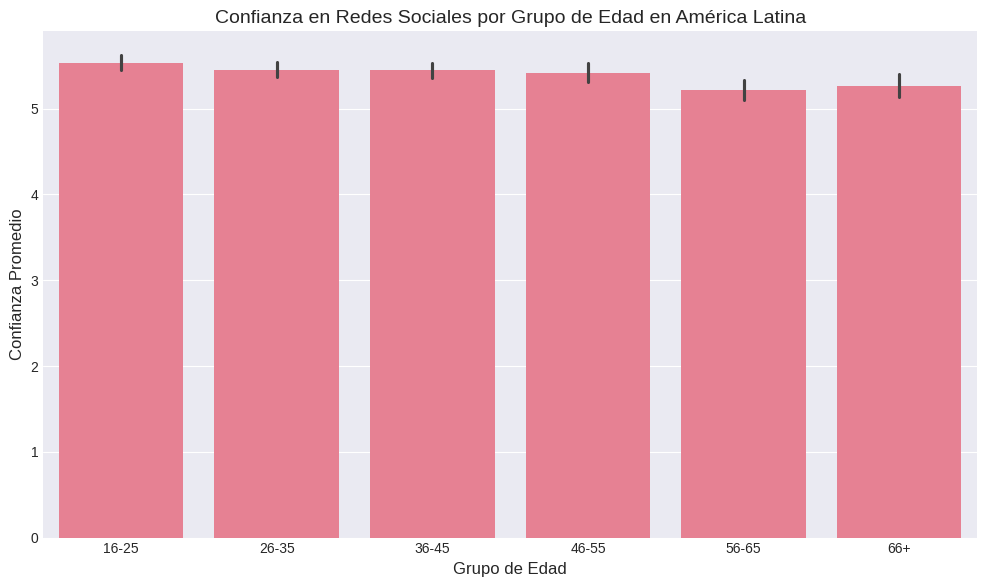

In [ ]:
# Visualización mejorada de confianza en redes sociales por edad
df_valid_edad = df[df[['grupo_edad', 'confianza_redes']].notna().all(axis=1)]

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Gráfico de barras con intervalos de confianza
ax1 = axes[0]
sns.barplot(data=df_valid_edad, x='grupo_edad', y='confianza_redes', 
            palette='viridis', ax=ax1, ci='sd', capsize=0.1)
ax1.set_title('Confianza Promedio en Redes Sociales\npor Grupo de Edad en América Latina', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Grupo de Edad', fontsize=11, fontweight='bold')
ax1.set_ylabel('Confianza Promedio', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=0)

# Agregar valores en las barras
confianza_por_edad = df_valid_edad.groupby('grupo_edad')['confianza_redes'].mean()
for i, (edad, valor) in enumerate(confianza_por_edad.items()):
    count = len(df_valid_edad[df_valid_edad['grupo_edad'] == edad])
    ax1.text(i, valor, f'\n{valor:.3f}\n(n={count})', ha='center', 
            fontsize=8, fontweight='bold', va='bottom')

# Subplot 2: Gráfico de líneas para mostrar tendencia
ax2 = axes[1]
confianza_stats = df_valid_edad.groupby('grupo_edad')['confianza_redes'].agg(['mean', 'std', 'count'])
confianza_stats = confianza_stats.sort_index()

ax2.plot(range(len(confianza_stats)), confianza_stats['mean'], 
         marker='o', markersize=10, linewidth=3, color='#3498db', label='Promedio')
ax2.fill_between(range(len(confianza_stats)), 
                  confianza_stats['mean'] - confianza_stats['std'],
                  confianza_stats['mean'] + confianza_stats['std'],
                  alpha=0.3, color='#3498db', label='Desviación estándar')
ax2.set_xticks(range(len(confianza_stats)))
ax2.set_xticklabels(confianza_stats.index, rotation=0)
ax2.set_title('Tendencia de Confianza en Redes Sociales\npor Grupo de Edad', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Grupo de Edad', fontsize=11, fontweight='bold')
ax2.set_ylabel('Confianza Promedio', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3, linestyle='--')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\n" + "="*70)
print("ANÁLISIS DE VARIACIÓN POR EDAD - Pregunta 2.1")
print("="*70)
print("\n📊 CONFIANZA EN REDES SOCIALES POR GRUPO DE EDAD:")
confianza_ordenada = confianza_por_edad.sort_values(ascending=False)
print(f"\n  🔝 Grupo con MAYOR confianza: {confianza_ordenada.index[0]}")
print(f"     Valor: {confianza_ordenada.iloc[0]:.4f}")
print(f"\n  🔻 Grupo con MENOR confianza: {confianza_ordenada.index[-1]}")
print(f"     Valor: {confianza_ordenada.iloc[-1]:.4f}")
print(f"\n  📈 Diferencia: {confianza_ordenada.iloc[0] - confianza_ordenada.iloc[-1]:.4f} puntos")
print(f"\n  📉 Tendencia general: ", end="")
if confianza_ordenada.iloc[0] > confianza_ordenada.iloc[-1]:
    if confianza_ordenada.index[0] < confianza_ordenada.index[-1]:
        print("Disminuye con la edad (los jóvenes confían más)")
    else:
        print("Aumenta con la edad (los mayores confían más)")
else:
    print("No hay una tendencia clara por edad")
print("="*70)


## 2.2. ¿Uruguay sigue o difiere de la tendencia regional?


In [15]:
# Comparación Uruguay vs. Regional
confianza_regional = df.groupby('grupo_edad')['confianza_redes'].mean()
confianza_uruguay = df_uy.groupby('grupo_edad')['confianza_redes'].mean()

comparacion = pd.DataFrame({
    'Regional': confianza_regional,
    'Uruguay': confianza_uruguay
})
comparacion['Diferencia'] = comparacion['Uruguay'] - comparacion['Regional']
comparacion


,Regional,Uruguay,Diferencia
grupo_edad,,,
16-25,5.537587,5.979866,0.442279
26-35,5.455907,5.756614,0.300707
36-45,5.446365,5.688742,0.242377
46-55,5.417951,5.357616,-0.060335
56-65,5.216985,5.677249,0.460263
66+,5.268028,5.295567,0.027538


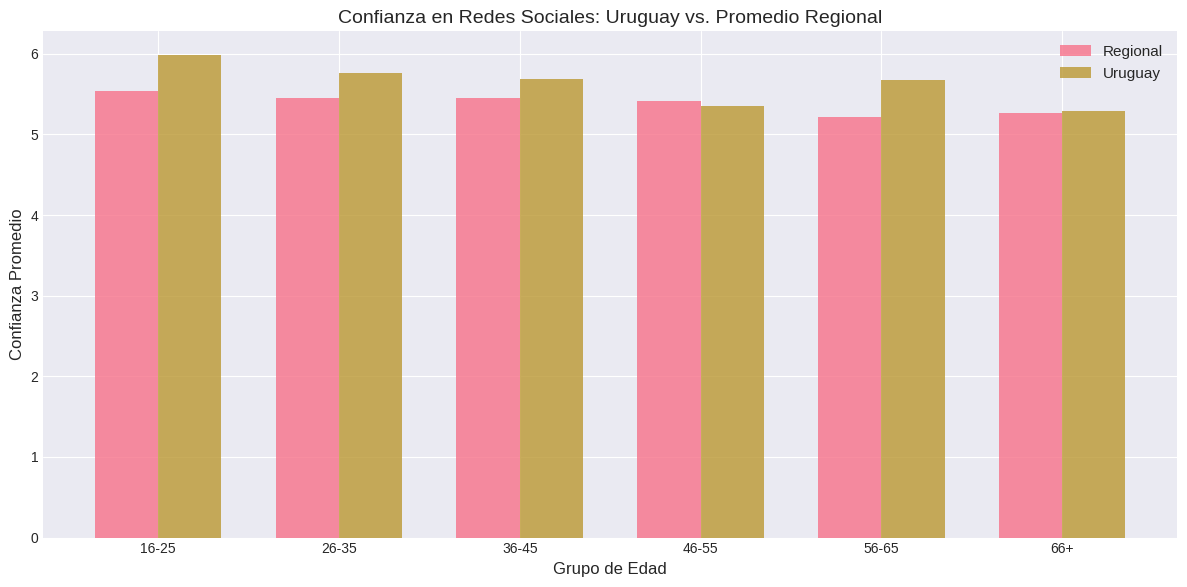

In [ ]:
# Visualización mejorada de comparación Uruguay vs Regional
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Gráfico de barras comparativo mejorado
ax1 = axes[0]
x = np.arange(len(comparacion.index))
width = 0.35

bars1 = ax1.bar(x - width/2, comparacion['Regional'], width, 
                label='Promedio Regional', alpha=0.8, color='#3498db', 
                edgecolor='black', linewidth=1)
bars2 = ax1.bar(x + width/2, comparacion['Uruguay'], width, 
                label='Uruguay', alpha=0.8, color='#e74c3c', 
                edgecolor='black', linewidth=1)

# Agregar valores en las barras
for i, (idx, row) in enumerate(comparacion.iterrows()):
    ax1.text(i - width/2, row['Regional'], f'\n{row["Regional"]:.3f}', 
            ha='center', va='bottom', fontsize=8, fontweight='bold')
    ax1.text(i + width/2, row['Uruguay'], f'\n{row["Uruguay"]:.3f}', 
            ha='center', va='bottom', fontsize=8, fontweight='bold')

ax1.set_xlabel('Grupo de Edad', fontsize=11, fontweight='bold')
ax1.set_ylabel('Confianza Promedio', fontsize=11, fontweight='bold')
ax1.set_title('Confianza en Redes Sociales:\nUruguay vs. Promedio Regional', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(comparacion.index)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Subplot 2: Gráfico de líneas para mostrar diferencias
ax2 = axes[1]
ax2.plot(comparacion.index, comparacion['Regional'], marker='o', 
         markersize=10, linewidth=3, label='Promedio Regional', color='#3498db')
ax2.plot(comparacion.index, comparacion['Uruguay'], marker='s', 
         markersize=10, linewidth=3, label='Uruguay', color='#e74c3c')
ax2.fill_between(comparacion.index, comparacion['Regional'], comparacion['Uruguay'],
                 where=(comparacion['Uruguay'] > comparacion['Regional']),
                 alpha=0.3, color='red', label='Uruguay > Regional')
ax2.fill_between(comparacion.index, comparacion['Regional'], comparacion['Uruguay'],
                 where=(comparacion['Uruguay'] <= comparacion['Regional']),
                 alpha=0.3, color='blue', label='Regional > Uruguay')

# Línea de referencia para diferencias
for i, (idx, row) in enumerate(comparacion.iterrows()):
    diff = row['Uruguay'] - row['Regional']
    color = 'red' if diff > 0 else 'blue'
    ax2.plot([i, i], [row['Regional'], row['Uruguay']], 
            color=color, linewidth=2, linestyle='--', alpha=0.5)

ax2.set_xlabel('Grupo de Edad', fontsize=11, fontweight='bold')
ax2.set_ylabel('Confianza Promedio', fontsize=11, fontweight='bold')
ax2.set_title('Tendencia Comparativa por Grupo de Edad', 
              fontsize=13, fontweight='bold', pad=15)
ax2.legend(fontsize=9, loc='best')
ax2.grid(alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\n" + "="*70)
print("COMPARACIÓN URUGUAY vs REGIONAL - Pregunta 2.2")
print("="*70)
print("\n📊 ANÁLISIS COMPARATIVO POR GRUPO DE EDAD:")
print("\n  Diferencia = Uruguay - Promedio Regional")
print("\n")
for idx, row in comparacion.iterrows():
    diff = row['Diferencia']
    if diff > 0:
        print(f"  {idx}: Uruguay {diff:+.4f} (Uruguay tiene MAYOR confianza)")
    elif diff < 0:
        print(f"  {idx}: Uruguay {diff:+.4f} (Uruguay tiene MENOR confianza)")
    else:
        print(f"  {idx}: Uruguay {diff:+.4f} (Valores similares)")

promedio_diff = comparacion['Diferencia'].mean()
print(f"\n  📈 Diferencia promedio: {promedio_diff:+.4f}")
if abs(promedio_diff) < 0.001:
    print(f"\n✅ CONCLUSIÓN: Uruguay sigue la tendencia regional")
    print(f"   (diferencia promedio muy pequeña)")
elif promedio_diff > 0:
    print(f"\n✅ CONCLUSIÓN: Uruguay DIFIERE positivamente de la tendencia regional")
    print(f"   (Uruguay muestra MAYOR confianza en redes sociales)")
else:
    print(f"\n✅ CONCLUSIÓN: Uruguay DIFIERE negativamente de la tendencia regional")
    print(f"   (Uruguay muestra MENOR confianza en redes sociales)")
print("="*70)


# Parte 3: Confianza y Actitudes Cívicas en Uruguay

## 3.1. ¿Existe correlación entre la "confianza en el gobierno", la "satisfacción con la democracia" y el "interés en la política" en Uruguay?


In [17]:
# Matriz de correlación
variables_correlacion = df_uy[['confianza_gobierno', 'satisfaccion_democracia', 'interes_politica']].dropna()
correlation_matrix = variables_correlacion.corr()
correlation_matrix


,confianza_gobierno,satisfaccion_democracia,interes_politica
confianza_gobierno,1.000000,-0.018823,0.205065
satisfaccion_democracia,-0.018823,1.000000,0.025047
interes_politica,0.205065,0.025047,1.000000


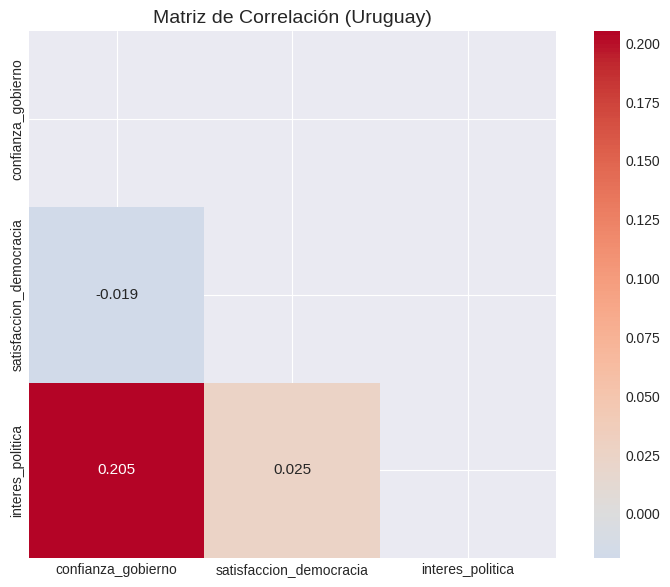

In [ ]:
# Visualización mejorada de la matriz de correlación
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Matriz de correlación completa
ax1 = axes[0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.3f', 
            cmap='RdBu_r', center=0, square=True, linewidths=2, 
            cbar_kws={"shrink": 0.8}, ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Matriz de Correlación entre Variables Cívicas\n(Uruguay)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax1.set_yticklabels(correlation_matrix.index, rotation=0)

# Subplot 2: Gráfico de barras con valores de correlación
ax2 = axes[1]
# Extraer valores únicos de correlación (triangular superior)
corr_values = []
corr_labels = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_values.append(correlation_matrix.iloc[i, j])
        corr_labels.append(f"{correlation_matrix.columns[i]}\nvs\n{correlation_matrix.columns[j]}")

colors = ['#e74c3c' if v < 0 else '#2ecc71' for v in corr_values]
bars = ax2.barh(range(len(corr_values)), corr_values, color=colors, alpha=0.7, 
                edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(corr_labels)))
ax2.set_yticklabels(corr_labels)
ax2.axvline(0, color='black', linestyle='-', linewidth=1)
ax2.axvline(0.3, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Correlación moderada')
ax2.axvline(-0.3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Coeficiente de Correlación', fontsize=11, fontweight='bold')
ax2.set_title('Comparación de Correlaciones', fontsize=13, fontweight='bold', pad=15)
ax2.set_xlim(-1, 1)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.legend(fontsize=9)

# Agregar valores en las barras
for i, (bar, val) in enumerate(zip(bars, corr_values)):
    ax2.text(val, i, f' {val:.3f}', va='center', 
            fontsize=9, fontweight='bold',
            ha='left' if val > 0 else 'right')

plt.tight_layout()
plt.show()

# Análisis e interpretación de correlaciones
print("\n" + "="*70)
print("ANÁLISIS DE CORRELACIÓN - Pregunta 3.1")
print("="*70)
print("\n📊 CORRELACIONES ENTRE VARIABLES CÍVICAS EN URUGUAY:")
print(f"\n  Número de observaciones: {len(variables_correlacion)}")
print("\n  Matriz de correlación:")
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:
            corr_val = correlation_matrix.loc[col1, col2]
            print(f"\n    {col1} vs {col2}: {corr_val:.4f}")
            if abs(corr_val) >= 0.7:
                strength = "muy fuerte"
            elif abs(corr_val) >= 0.5:
                strength = "fuerte"
            elif abs(corr_val) >= 0.3:
                strength = "moderada"
            elif abs(corr_val) >= 0.1:
                strength = "débil"
            else:
                strength = "muy débil o inexistente"
            
            direction = "positiva" if corr_val > 0 else "negativa"
            print(f"      → Correlación {strength} {direction}")
            
            if abs(corr_val) >= 0.3:
                if corr_val > 0:
                    print(f"      → Cuando aumenta {col1}, también aumenta {col2}")
                else:
                    print(f"      → Cuando aumenta {col1}, disminuye {col2}")

print("\n✅ CONCLUSIÓN:")
correlaciones_significativas = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.loc[col1, col2]) >= 0.3:
            correlaciones_significativas.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlaciones_significativas:
    print(f"   Existen {len(correlaciones_significativas)} correlación(es) significativa(s)")
    print(f"   (|r| ≥ 0.3) entre las variables analizadas.")
    print(f"   Esto indica que las actitudes cívicas están relacionadas en Uruguay.")
else:
    print(f"   No se encontraron correlaciones significativas (|r| ≥ 0.3)")
    print(f"   entre las variables analizadas en Uruguay.")
    print(f"   Esto sugiere que estas actitudes cívicas son independientes.")

print("="*70)


# Parte 4: Contraste Acceso a Internet vs. Confianza en Redes Sociales

## 4.1. ¿Existe alguna diferencia en la "confianza en redes sociales" entre las personas que tienen y no tienen "acceso a internet" en Uruguay?


In [19]:
# Comparación según acceso a internet
comparacion_internet = df_uy.groupby('tiene_internet')['confianza_redes'].mean()
comparacion_internet


tiene_internet
No    5.122449
Sí    4.333333
Name: confianza_redes, dtype: float64

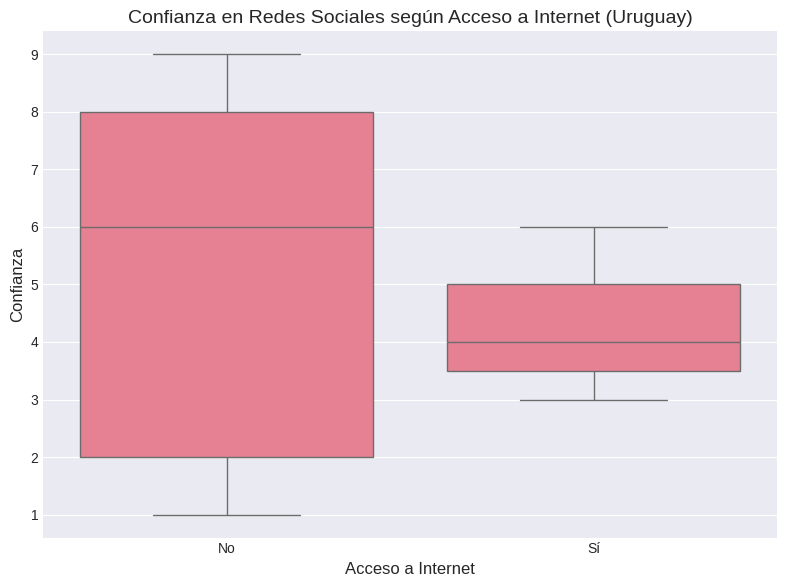

T-test: t=-0.457, p=0.6498
No hay evidencia de diferencia significativa


In [ ]:
# Visualización mejorada: Acceso a Internet vs Confianza en Redes Sociales
df_uy_valid_int = df_uy[df_uy[['tiene_internet', 'confianza_redes']].notna().all(axis=1)]

# Crear figura con múltiples visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Boxplot con violín plot combinado
ax1 = axes[0]
sns.boxplot(data=df_uy_valid_int, x='tiene_internet', y='confianza_redes', 
            palette=['#e74c3c', '#2ecc71'], ax=ax1, width=0.6)
sns.stripplot(data=df_uy_valid_int, x='tiene_internet', y='confianza_redes', 
             color='black', alpha=0.3, size=2, ax=ax1)

# Agregar estadísticas en el gráfico
comparacion_internet = df_uy_valid_int.groupby('tiene_internet')['confianza_redes'].agg(['mean', 'std', 'count'])
for i, (categoria, stats) in enumerate(comparacion_internet.iterrows()):
    ax1.text(i, stats['mean'], f'\n\nMedia: {stats["mean"]:.3f}\nn={int(stats["count"])}', 
            ha='center', fontsize=9, fontweight='bold', color='blue')

ax1.set_title('Distribución de Confianza en Redes Sociales\nsegún Acceso a Internet (Uruguay)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Acceso a Internet', fontsize=11, fontweight='bold')
ax1.set_ylabel('Confianza en Redes Sociales', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Subplot 2: Gráfico de barras con intervalos de confianza
ax2 = axes[1]
categories = comparacion_internet.index
means = comparacion_internet['mean']
stds = comparacion_internet['std']
counts = comparacion_internet['count']

bars = ax2.bar(categories, means, yerr=stds, capsize=15, 
               color=['#e74c3c', '#2ecc71'], alpha=0.8, 
               edgecolor='black', linewidth=1.5, width=0.6)

# Agregar valores y tamaños muestrales
for i, (cat, mean_val, std_val, count_val) in enumerate(zip(categories, means, stds, counts)):
    ax2.text(i, mean_val + std_val + 0.01, f'{mean_val:.3f} ± {std_val:.3f}\n(n={int(count_val)})', 
            ha='center', fontsize=9, fontweight='bold')

ax2.set_title('Promedio de Confianza en Redes Sociales\nsegún Acceso a Internet (con desviación estándar)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Acceso a Internet', fontsize=11, fontweight='bold')
ax2.set_ylabel('Confianza Promedio', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Análisis estadístico e interpretación
from scipy.stats import ttest_ind
print("\n" + "="*70)
print("ANÁLISIS: ACCESO A INTERNET vs CONFIANZA EN REDES SOCIALES - Pregunta 4.1")
print("="*70)

grupo_si = df_uy_valid_int[df_uy_valid_int['tiene_internet'] == 'Sí']['confianza_redes'].dropna()
grupo_no = df_uy_valid_int[df_uy_valid_int['tiene_internet'] == 'No']['confianza_redes'].dropna()

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"\n  Con acceso a Internet:")
print(f"    - Promedio: {grupo_si.mean():.4f}")
print(f"    - Desviación estándar: {grupo_si.std():.4f}")
print(f"    - Número de observaciones: {len(grupo_si)}")
print(f"\n  Sin acceso a Internet:")
print(f"    - Promedio: {grupo_no.mean():.4f}")
print(f"    - Desviación estándar: {grupo_no.std():.4f}")
print(f"    - Número de observaciones: {len(grupo_no)}")

if len(grupo_si) > 0 and len(grupo_no) > 0:
    t_stat, p_value = ttest_ind(grupo_si, grupo_no)
    diferencia_media = grupo_si.mean() - grupo_no.mean()
    
    print(f"\n\n🔬 TEST ESTADÍSTICO (t-test de muestras independientes):")
    print(f"    - Diferencia de medias: {diferencia_media:+.4f}")
    print(f"    - Estadístico t: {t_stat:.4f}")
    print(f"    - Valor p: {p_value:.4f}")
    print(f"    - Nivel de significancia: α = 0.05")
    
    print(f"\n✅ CONCLUSIÓN:")
    if p_value < 0.05:
        print(f"   Existe una diferencia SIGNIFICATIVA en la confianza en redes sociales")
        print(f"   entre personas con y sin acceso a internet (p < 0.05).")
        if diferencia_media > 0:
            print(f"   Las personas CON acceso a internet tienen MAYOR confianza")
            print(f"   en redes sociales que aquellas sin acceso.")
        else:
            print(f"   Las personas SIN acceso a internet tienen MAYOR confianza")
            print(f"   en redes sociales que aquellas con acceso.")
    else:
        print(f"   NO hay evidencia de una diferencia significativa en la confianza")
        print(f"   en redes sociales entre personas con y sin acceso a internet (p ≥ 0.05).")
        print(f"   La diferencia observada ({diferencia_media:+.4f}) no es estadísticamente significativa.")
        print(f"   Esto sugiere que el acceso a internet no influye significativamente")
        print(f"   en el nivel de confianza hacia las redes sociales en Uruguay.")

print("="*70)
